# M605 Machine Learning (SS0324) Assignment


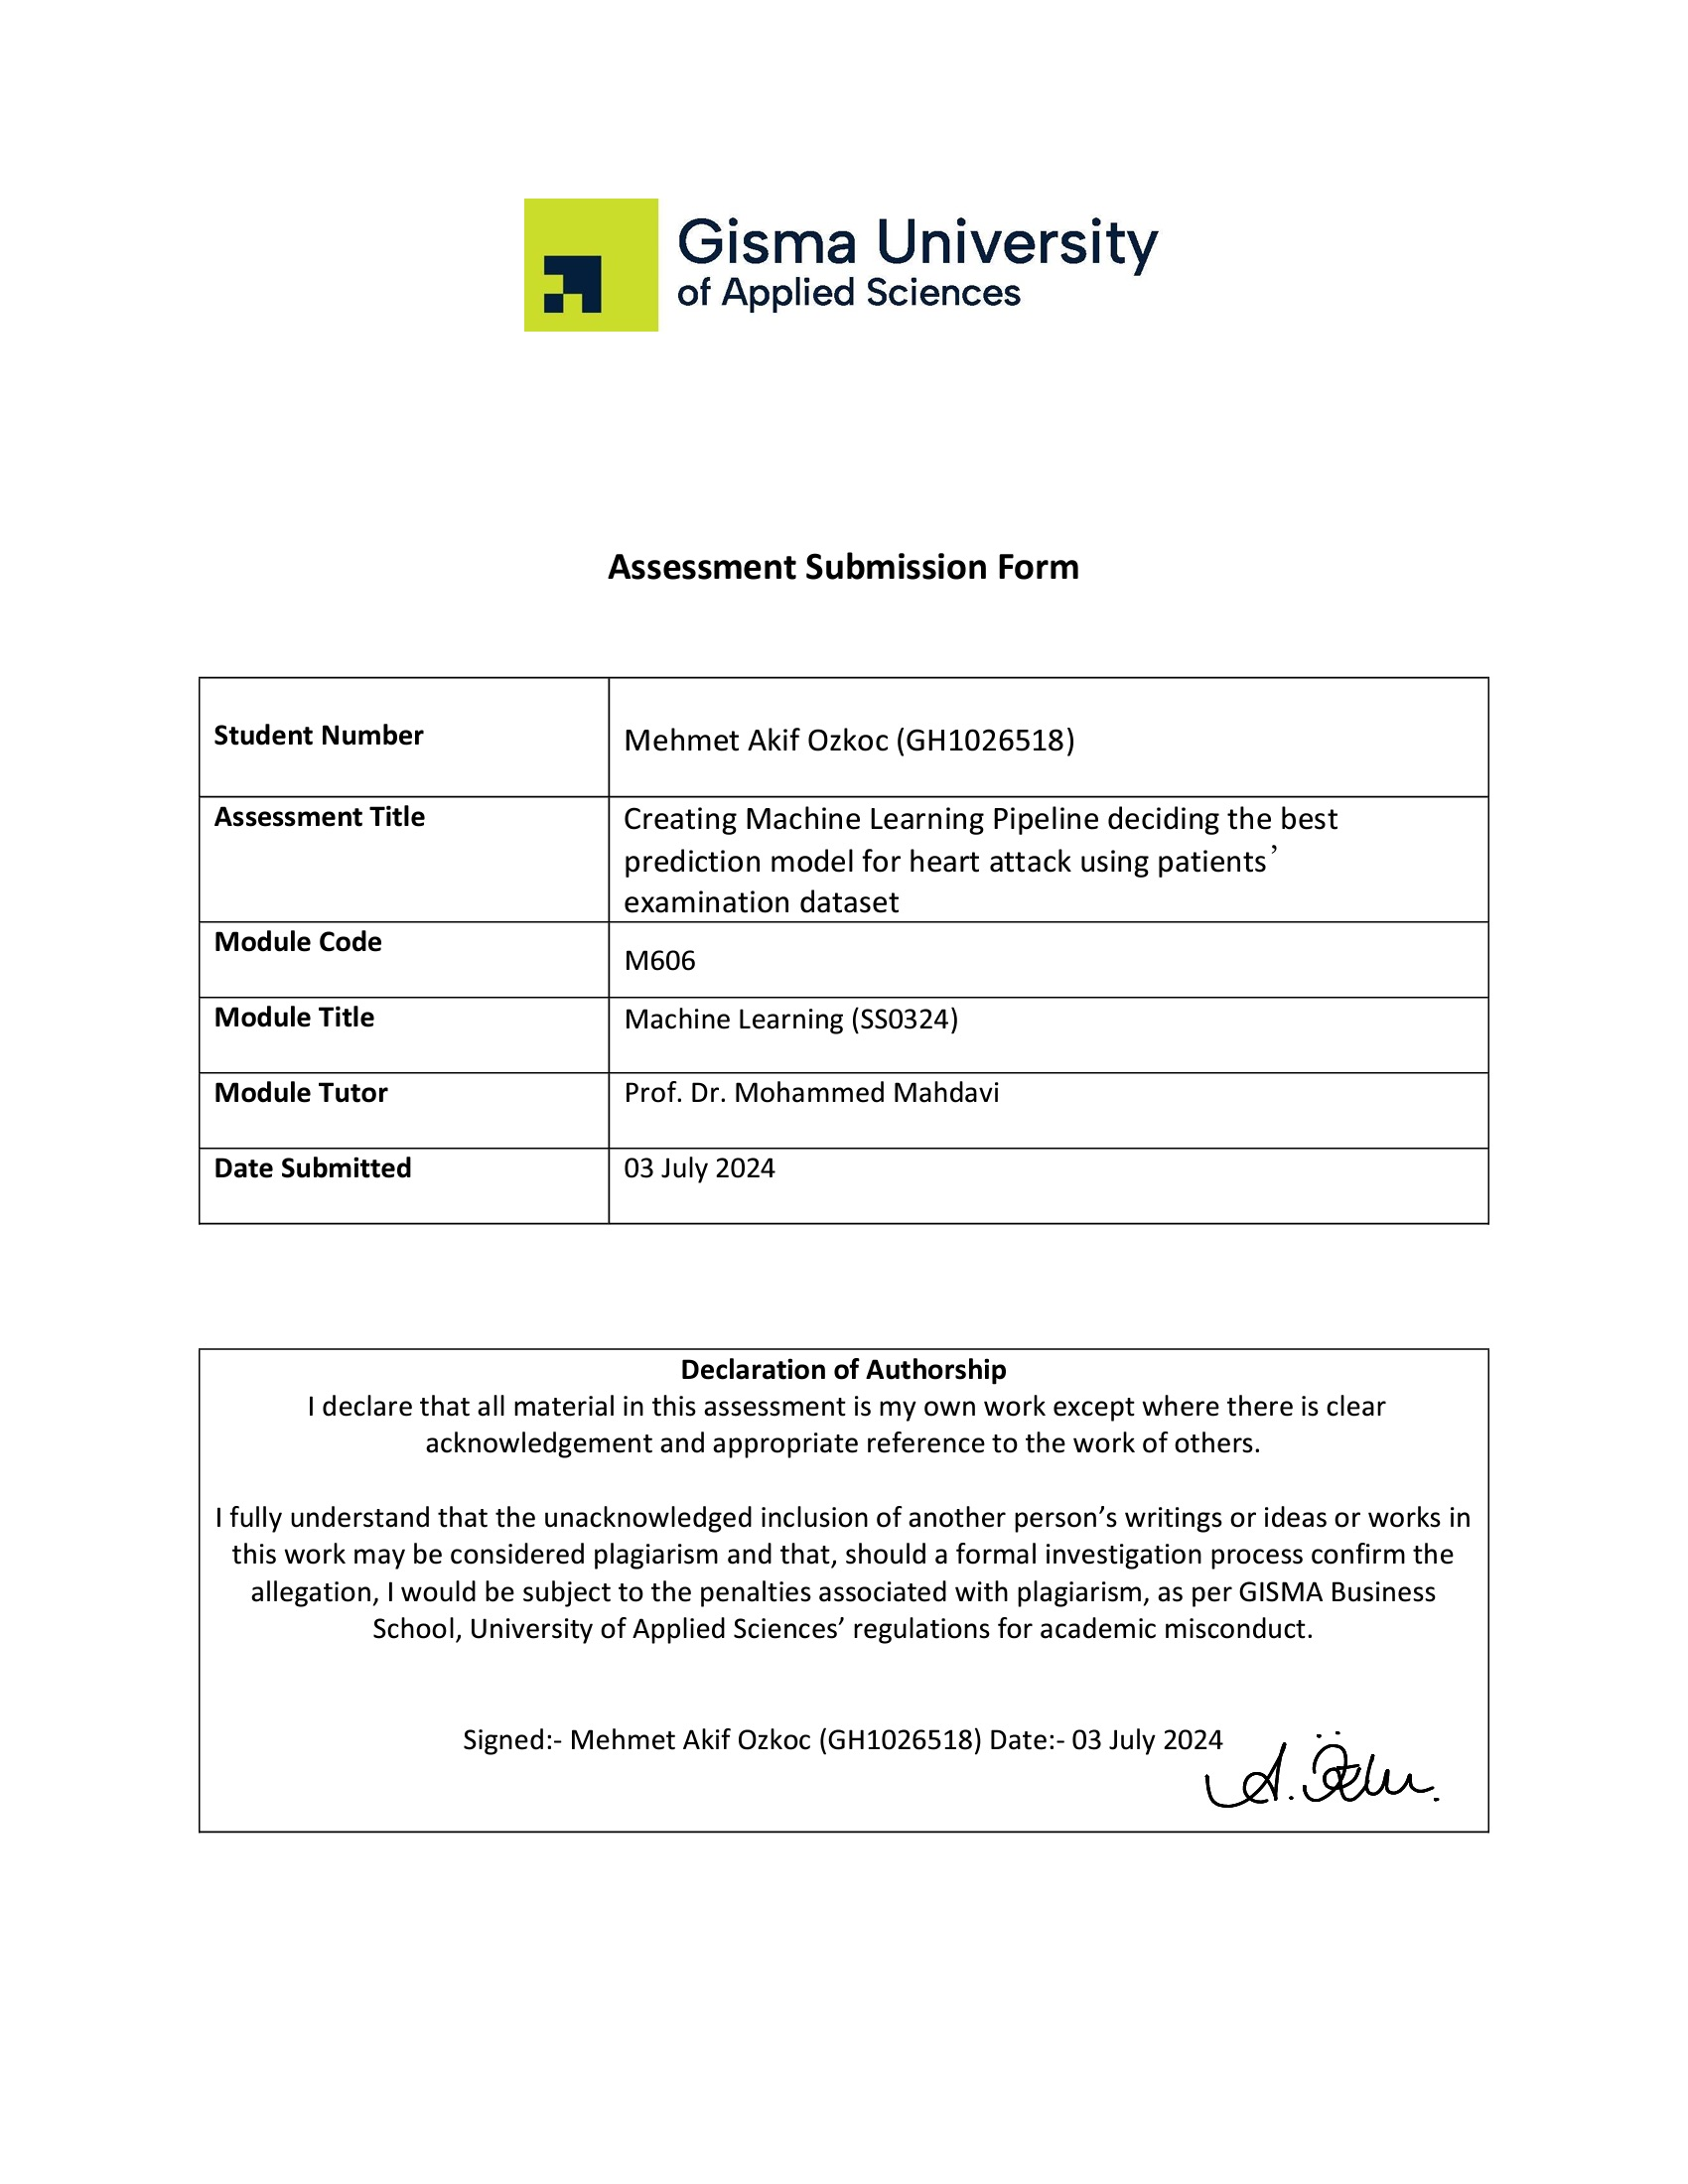 

### Assessment Details
### Problem Statement

Heart disease remains the leading cause of death in the developed world, representing a critical public health challenge. The severe consequences of heart attacks and strokes highlight the urgent need for effective preventive measures to reduce the incidence and impact of these conditions. Early detection of individuals at high risk for heart disease is crucial for enabling timely interventions and improving patient outcomes.

This project focuses on utilizing machine learning techniques to predict the likelihood of heart attacks in patients by analyzing a dataset comprising various medical features. The dataset includes the following features:

--Age
--Sex
--Chest Pain Type (cp)
--Resting Blood Pressure (trtbps)
--Serum Cholesterol (chol)
--Fasting Blood Sugar (fbs)
--Resting Electrocardiographic Results (restecg)
--Maximum Heart Rate Achieved (thalachh)
--Exercise Induced Angina (exng)
--ST Depression Induced by Exercise Relative to Rest (oldpeak)
--Slope of the Peak Exercise ST Segment (slp)
--Number of Major Vessels Colored by Fluoroscopy (caa)
--Thalassemia (thall)
--Target Variable Indicating Presence of Heart Disease (output)

By analyzing these features, the machine learning model aims to accurately predict the likelihood of a heart attack in the near future. The results of this predictive model can provide valuable insights to healthcare providers, enabling them to develop targeted prevention strategies and personalized treatment plans. Ultimately, this project contributes to the broader goal of reducing heart disease-related mortality and improving public health outcomes.

## Github Repo: https://github.com/ozkoc/M606_Machine_Learning

## Data Exploration

- Check features and notes of the dataset creators -> Understanding the features will be helpful in EDA, removing outliers, feature engineering parts etc.


### Import necessary packages
We will use pandas and numpy for data analysis nd manupulation porposes.
matplotlib and searborn for data visulizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection
import sklearn.metrics
import sklearn.svm
import sklearn.tree 

### Load the data

In [2]:
df = pd.read_csv('heart.csv')

### First check

In [3]:
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


#### First observations:
- They are all numerical, but not scaled.
- 13 features, 1 target column. First 13 features are our independent variables - Output column will be our label column. 
- Outputs are all 1 for the first 10 samples. Probably, they are ordered. Shuffling is necessary.
- It seems that we don't have missing values. However, we cannot be sure with only 10 samples. We should check it!

### Information about independent variables and target feature which is 'output'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Some notes:
- 303 samples, not too much data
- Data types are numerical for all. We don't need to use label encoding.
- 303 non-null for all. Same with total sample size so we don't have any missing values.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Important statistical info:
- Check min, max and mean values of the features.
- If mean value is close to the min, then Feature's distribution is left-skewed or right-skewed. Therefore we can expect some outliers. 
- We should check and pay attention to biggest values. Of course, from this information, it is hard to be sure. Therefore, we need to use some data visualization techniques to check and pay attendtion.
- Check mean and std values of the features. 
- If std is bigger than mean, again we can expect outliers for that feature.
- Min and max values show that features are not scaled.
- We have some continous and discrete features. "chol" is continous. "exng" is discrete and it can take only 0 or 1. So, categorical.


### Check missing values

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### We don't have any missing values. 
If we had too many missing values, we could remove the rows with missing values if we had sufficient data. However, in this case, we have only 303 samples. Therefore, we would consider filling the missing values. We would fill with mean values for the important groups. 
For this dataset, we don't need!

### Class Distribution

This is a classification problem so we need to check class distribution

In [7]:
# target column is "output"
df['output'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: output, dtype: float64

####  checking the output here,
%55-45 is a balanced distribution. It doesn't have to be 50-50. Sometimes, it could be seen as %2-98. Obviously, it would be imbalanced. 
On the other hand, if the data balanceis %30-70, Before having aggrement on imbalanced dataset, we should see the model's performance. If there is no bias for the dominant class, that distribution can be considered as "balanced".

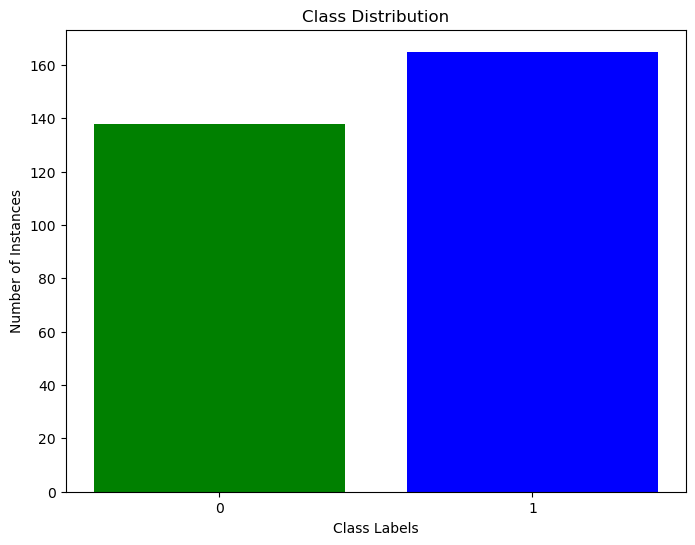

In [8]:
unique_classes = df['output'].unique()
class_counts = df['output'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color=['blue', 'green'])
plt.xlabel('Class Labels')
plt.ylabel('Number of Instances')
plt.title('Class Distribution')
plt.xticks(unique_classes)
plt.show()

### Visualization and checking for outliers

In [9]:
target_column = 'output'

# all features
features = np.array(df.columns.difference([target_column])) #using df.columns excluding 'output' column

# categorical features
categorical_features = ['sex', 'cp', 'restecg', 'slp', 'caa', 'thall', 'fbs', 'exng']

# others
non_cat_features = [feature for feature in features if feature not in categorical_features]

print("All features -> ", features)
print("Non-categorical features -> ", non_cat_features)
print("Categorical features -> ", categorical_features)
print(f"All -> {len(features)} | Categorical -> {len(categorical_features)} | Others -> {len(non_cat_features)}")

All features ->  ['age' 'caa' 'chol' 'cp' 'exng' 'fbs' 'oldpeak' 'restecg' 'sex' 'slp'
 'thalachh' 'thall' 'trtbps']
Non-categorical features ->  ['age', 'chol', 'oldpeak', 'thalachh', 'trtbps']
Categorical features ->  ['sex', 'cp', 'restecg', 'slp', 'caa', 'thall', 'fbs', 'exng']
All -> 13 | Categorical -> 8 | Others -> 5


#### We visualize the relationship between independent variables

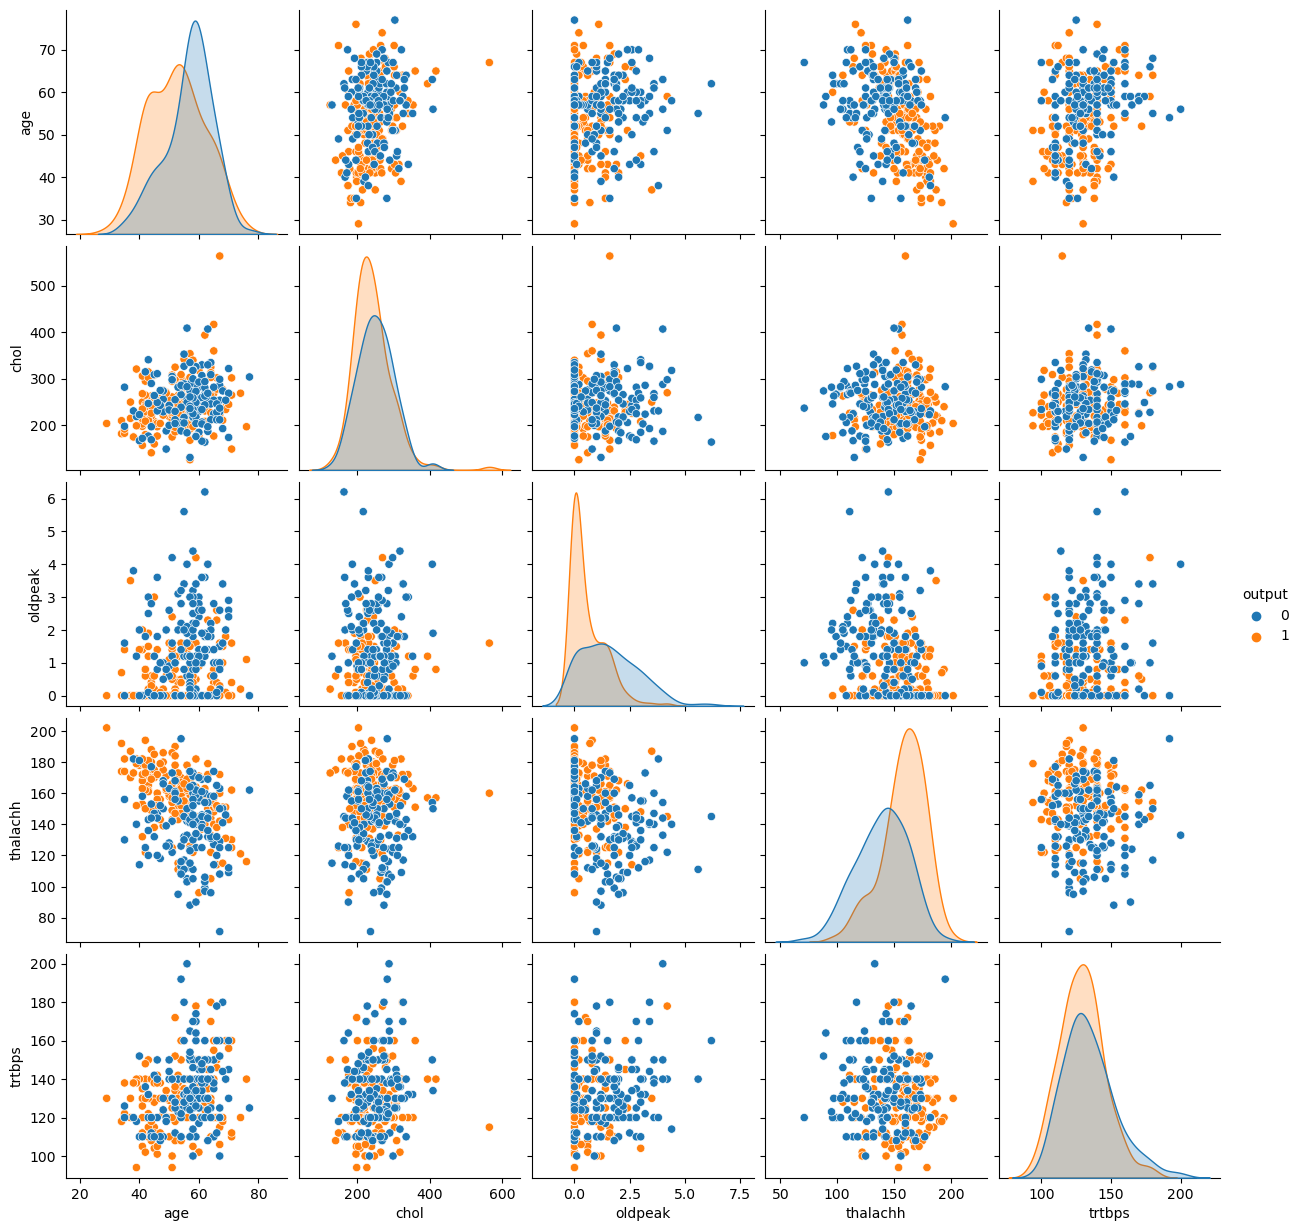

In [10]:
# Create scatter plots using pairplot
target = df['output']
# Combine the selected features and target into a single DataFrame
df_selected = pd.concat([df[non_cat_features], target], axis=1)

sns.pairplot(df_selected, hue='output', diag_kind='kde')
plt.show()

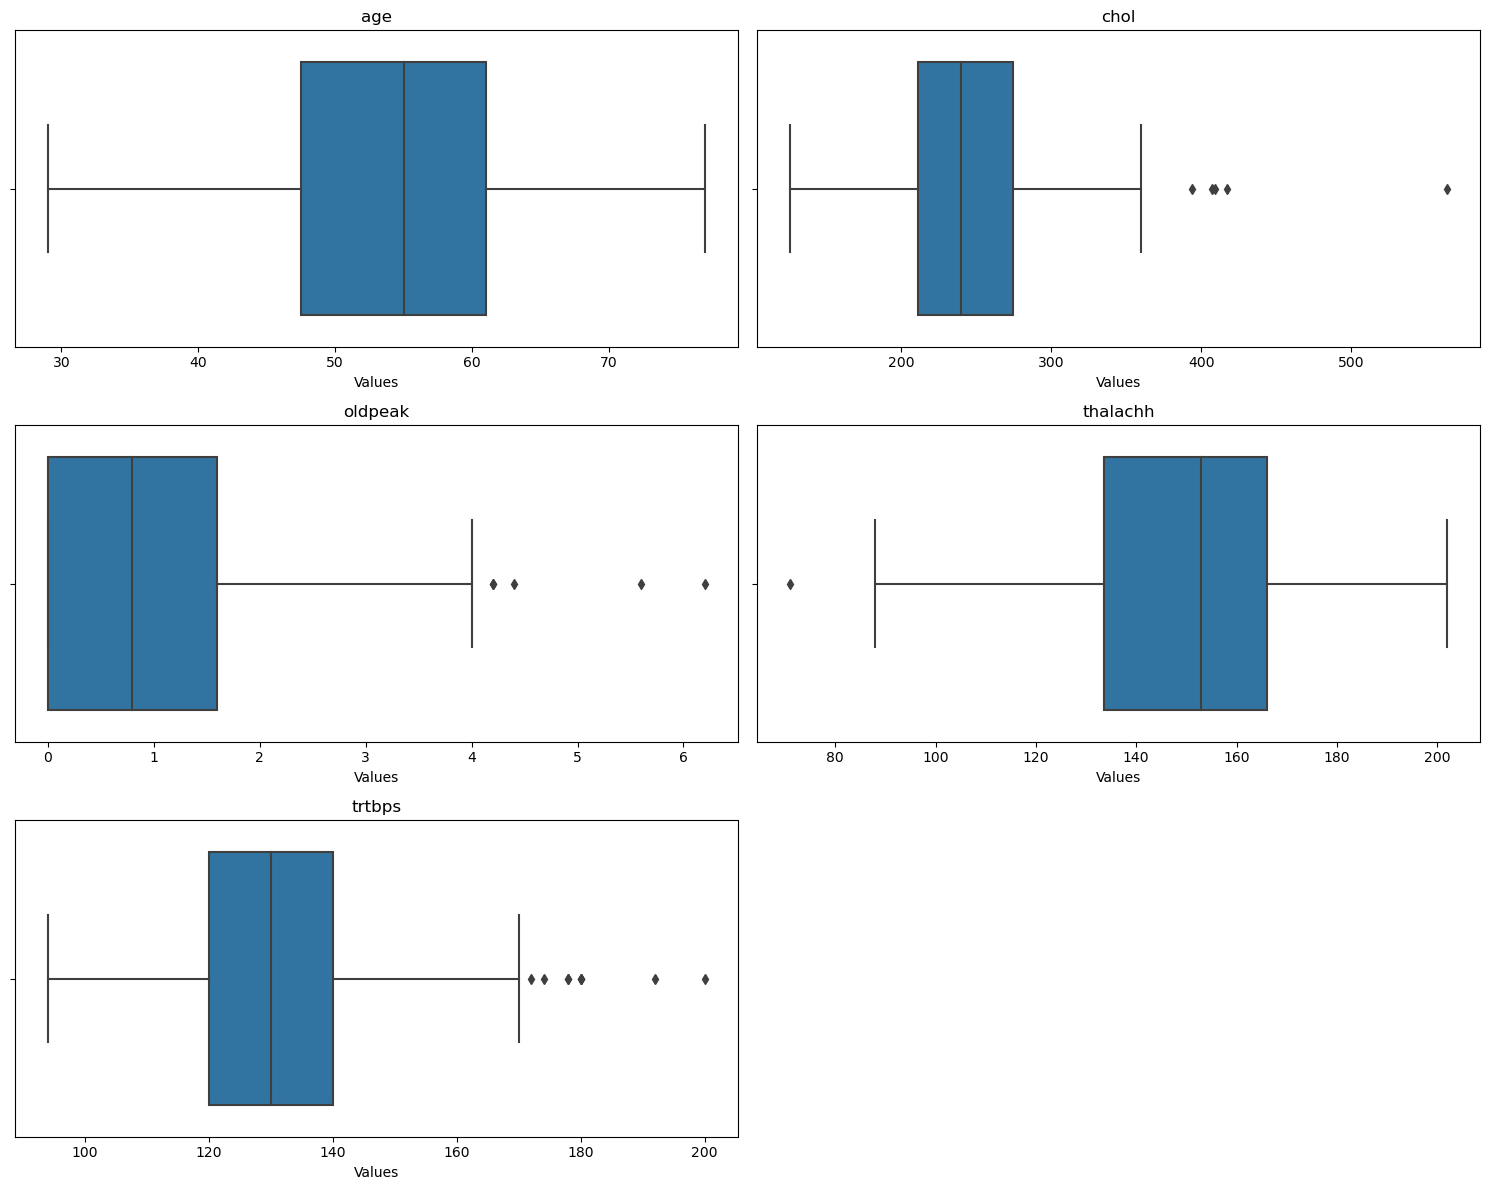

In [11]:
# we have 5 non_categorical features
num_rows = 3
num_cols = 2

plt.figure(figsize=(15, 12))

# Loop through each feature and create a subplot
for i, feature in enumerate(non_cat_features):  # If using a DataFrame
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(feature)
    plt.xlabel('Values')

plt.tight_layout()
plt.show() 

In [12]:
# thresholds for the potential outliers?
chol_threshold = 400  # outliers > 400
oldpeak_threshold = 4  # outliers > 4
thalachh_threshold = 80 # outliers < 80
trtbps_threshold = 180  # outliers > 180

In [13]:
print(len(df[df['chol']>400]))
print(len(df[df['oldpeak']>4]))
print(len(df[df['thalachh']<80]))
print(len(df[df['trtbps']>180]))

4
5
1
2


#### So we totally 12 data points which are potentially outliers. 

### Let's check one by one

In [14]:
df[df['chol']>400]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [15]:
df[df['oldpeak']>4]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
250,51,1,0,140,298,0,1,122,1,4.2,1,3,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [16]:
df[df['thalachh']<80]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [17]:
df[df['trtbps']>180]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0


#### Important:
Most of the potential outliers belong to class "0". Removing all can affect the model's performance on specific classes.

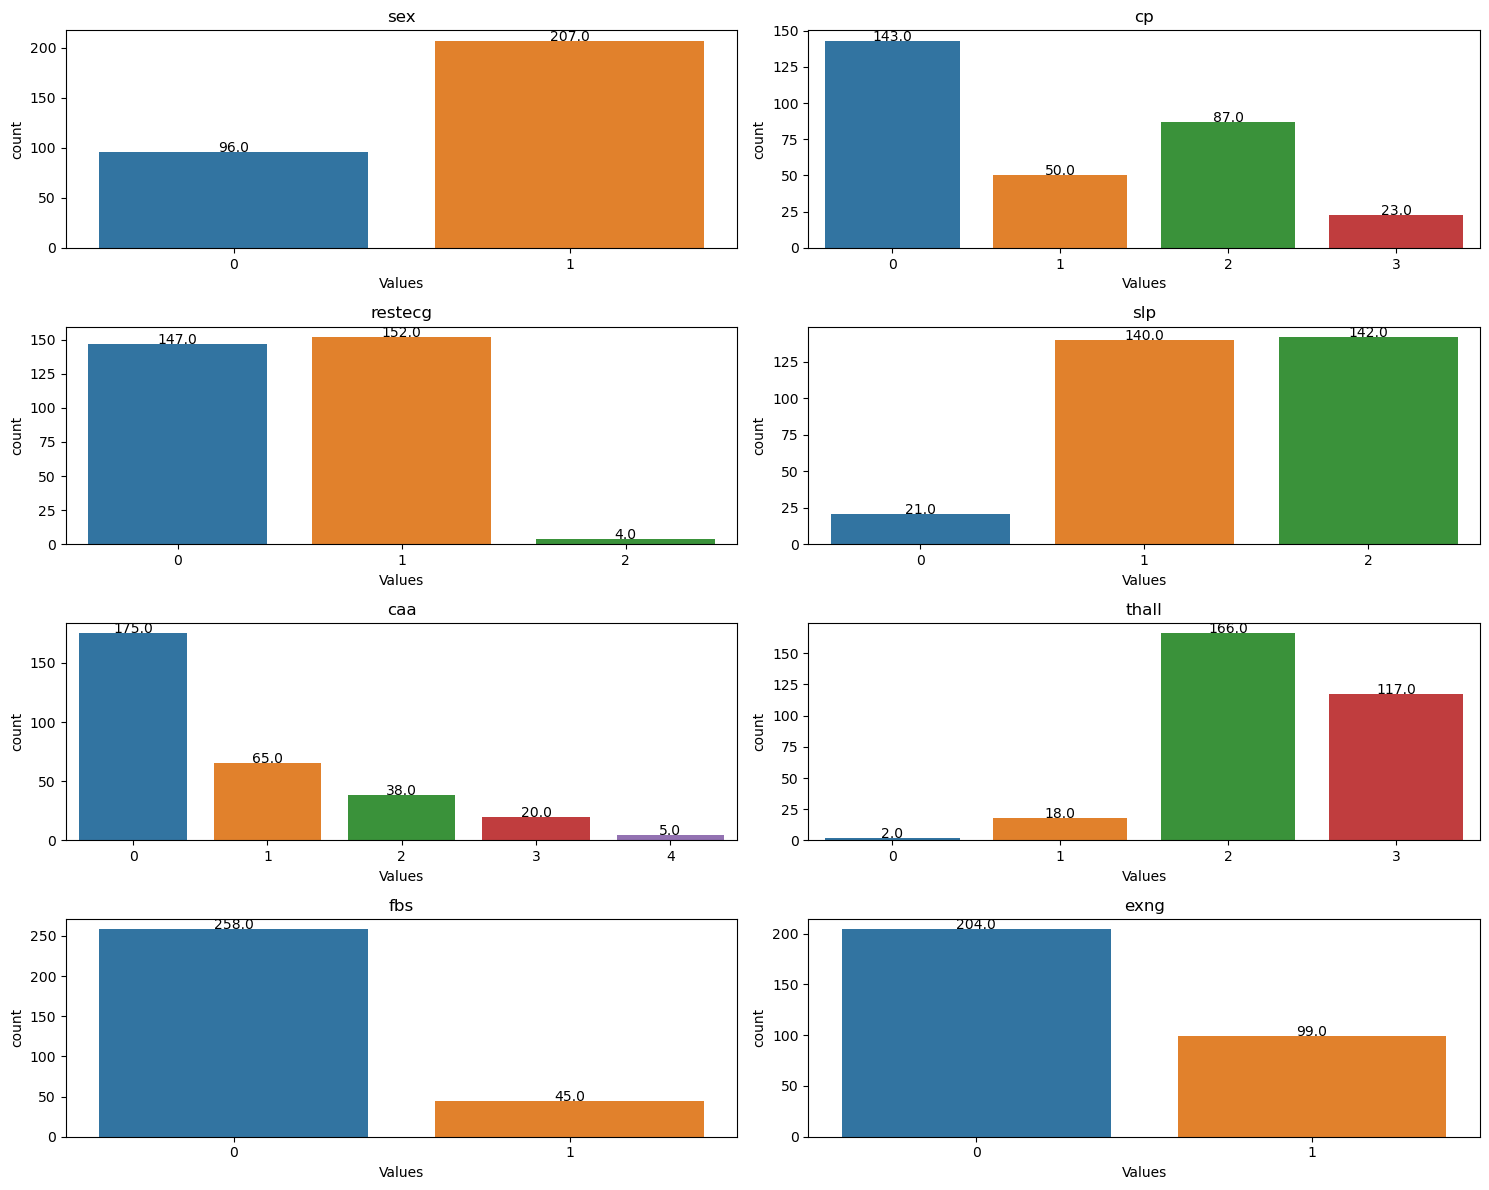

In [18]:
# we have 8 features
num_rows = 4
num_cols = 2

plt.figure(figsize=(15, 12))

# Loop through each feature and create a subplot
for i, feature in enumerate(categorical_features):  # If using a DataFrame
    plt.subplot(num_rows, num_cols, i + 1)
    ax = sns.countplot(x=df[feature])
    plt.title(feature)
    plt.xlabel('Values')
    
    # Add exact values to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.tight_layout()
plt.show()

In [19]:
# potential outliers
# restecg -> 2
# thall -> 0
print(len(df[df['restecg']==2]))
print(len(df[df['thall']==0]))

4
2


In [20]:
df[df['restecg']==2]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0


In [21]:
df[df['thall']==0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


#### 18 outliers!
The features have been checked and a threshold based on the plots has been set. However, at this step, domain knowledge is also critical. If you have knowledge or access to experts, you can consult them. For example, 0 for the "thall" feature can be impossible and it may be a typo. Or maybe it is critical and our data is not representative enough. 

4 + 5 + 1 + 2 + 4 + 2 => Totally 18 outliers. This value is also important. Since we have only 303 samples, if it was like 50 it would be too much. 18 is nearly %6 of our dataset. Therefore, it may be acceptable. However, as you see most of the potential outliers belong to class 0. 
5 of them belongs to Class 1 
13 of them belongs to Class 0. We need more analysis.

## Data Preprocessing and preparing the data for the models

We will check data with outliers and without.

### Create X and y with outliers

In [22]:
X = df.drop(columns=['output'])
y = df['output']

In [23]:
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

### Splitting the dataset as train and test dataset with the size of 20 %

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [26]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("----------------------------")
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (242, 13)
X_test shape (61, 13)
----------------------------
y_train shape (242,)
y_test shape (61,)


### Scale the features

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
X_train

array([[0.83333333, 0.        , 1.        , ..., 1.        , 0.5       ,
        0.66666667],
       [0.77083333, 1.        , 0.33333333, ..., 0.5       , 0.75      ,
        0.33333333],
       [0.54166667, 0.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       ...,
       [0.45833333, 0.        , 0.66666667, ..., 1.        , 0.        ,
        0.66666667],
       [0.54166667, 1.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       [0.72916667, 0.        , 0.        , ..., 1.        , 0.        ,
        0.66666667]])

In [29]:
X_test

array([[ 0.58333333,  1.        ,  0.        ,  0.52830189,  0.53003534,
         0.        ,  0.        ,  0.21052632,  1.        ,  0.09677419,
         0.5       ,  0.25      ,  0.33333333],
       [ 0.79166667,  1.        ,  0.        ,  0.29245283,  0.45229682,
         1.        ,  0.5       ,  0.65789474,  0.        ,  0.03225806,
         0.5       ,  0.5       ,  1.        ],
       [ 0.35416667,  1.        ,  0.        ,  0.43396226,  0.65371025,
         0.        ,  0.5       ,  0.28070175,  1.        ,  0.29032258,
         0.5       ,  0.5       ,  1.        ],
       [ 0.64583333,  1.        ,  0.66666667,  0.43396226,  0.20848057,
         0.        ,  0.        ,  0.5877193 ,  0.        ,  0.48387097,
         0.5       ,  0.        ,  0.66666667],
       [ 0.4375    ,  1.        ,  0.66666667,  0.43396226,  0.37809187,
         0.        ,  0.5       ,  0.65789474,  0.        ,  0.09677419,
         0.5       ,  0.25      ,  1.        ],
       [ 0.85416667,  1.      

## Building ML Models and Training the data on them

##### First I start with MLPClassifier. I want to check the data with or without outliers, see the performance.

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
model = MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=1000, random_state=42)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=1000, random_state=42)

### Make predictions to obtain predicted_values

In [32]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

In [33]:
y_pred = model.predict(X_test)

In [34]:
confusion_matrix(y_test, y_pred)

array([[17, 11],
       [ 3, 30]], dtype=int64)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [36]:
print("Accuracy:", round(accuracy,4))
print("Recall:", round(recall, 4))
print("Precision:", round(precision,4))

Accuracy: 0.7705
Recall: 0.9091
Precision: 0.7317


### Let's look at the results without outliers

We will preserve the original 'df' and create copy of it.

In [37]:
df_2 = df.copy()

In [38]:
df_2 = df_2[df_2['chol']<400]
df_2 = df_2[df_2['oldpeak']<4]
df_2 = df_2[df_2['thalachh']>80]
# df_2 = df_2[df_2['trtbps']<180]
# df_2 = df_2[df_2['restecg']!=2]
# df_2 = df_2[df_2['thall']!=0]

In [39]:
df_2['output'].value_counts(normalize=True)

1    0.556701
0    0.443299
Name: output, dtype: float64

In [40]:
df_2

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [41]:
X_2 = df_2.drop(columns=['output'])
y_2 = df_2['output']

In [42]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, stratify=y_2, test_size=0.2, random_state=42)

In [43]:
scaler_2 = MinMaxScaler()
X_train_2 = scaler_2.fit_transform(X_train_2)
X_test_2 = scaler.transform(X_test_2)

In [44]:
model = MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=1000, random_state=42)
model.fit(X_train_2, y_train_2)

MLPClassifier(hidden_layer_sizes=(200, 100, 50), max_iter=1000, random_state=42)

In [45]:
y_pred_2 = model.predict(X_test_2)
confusion_matrix(y_test_2, y_pred_2)

array([[20,  6],
       [ 7, 26]], dtype=int64)

In [46]:
accuracy = accuracy_score(y_test_2, y_pred_2)
recall = recall_score(y_test_2, y_pred_2)
precision = precision_score(y_test_2, y_pred_2)
print("Accuracy:", round(accuracy,4))
print("Recall:", round(recall, 4))
print("Precision:", round(precision,4))

Accuracy: 0.7797
Recall: 0.7879
Precision: 0.8125


#### So result is not better without outliers. So that probably they are not outliers. We will not drop any data.

### Check performance on SVM 

In [47]:
from sklearn.svm import SVC

In [48]:
model = SVC(kernel='rbf', C=1.0, random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [49]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[19,  9],
       [ 3, 30]], dtype=int64)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", round(accuracy,4))
print("Recall:", round(recall, 4))
print("Precision:", round(precision,4))

Accuracy: 0.8033
Recall: 0.9091
Precision: 0.7692


### Check performance on Decision Tree

In [52]:
parameters_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 20, 3),  
    "min_samples_split" : range(2, 20, 3)
}    

model_2 = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(), 
                                               parameters_grid, scoring = "accuracy", cv=5, n_jobs = -1)

model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", round(accuracy,4))
print("Recall:", round(recall, 4))
print("Precision:", round(precision,4))

Accuracy: 0.8033
Recall: 0.8788
Precision: 0.7838


## Check performance on KNN

In [53]:
parameters_grid = {
     "n_neighbors": [1, 5, 10, 15, 20],
     "metric": ["minkowski", "euclidean", "manhattan"]
}

model_3 = sklearn.model_selection.GridSearchCV(sklearn.neighbors.KNeighborsClassifier(),
                                                 parameters_grid, scoring="accuracy", cv=5, n_jobs = -1)

model_3.fit(X_train, y_train)
y_pred = model_3.predict(X_test)
confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", round(accuracy,4))
print("Recall:", round(recall, 4))
print("Precision:", round(precision,4))

Accuracy: 0.8197
Recall: 0.9091
Precision: 0.7895


### I want to check the numbers also on XGBoost

In [ ]:
!pip install xgboost

In [54]:
import xgboost as xgb

In [55]:
model_4 = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds (trees)
    max_depth=3,  # Maximum depth of each tree
    learning_rate=0.1,  # Step size for each iteration
    random_state=42
)

model_4.fit(X_train, y_train)
y_pred = model_4.predict(X_test)
confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", round(accuracy,4))
print("Recall:", round(recall, 4))
print("Precision:", round(precision,4))

Accuracy: 0.7869
Recall: 0.8788
Precision: 0.7632


### And Finally on Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
# Create a Random Forest classifier
model_5 = RandomForestClassifier(n_estimators=100, random_state=42)
model_5.fit(X_train, y_train)
y_pred = model_5.predict(X_test)
confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print("Accuracy:", round(accuracy,4))
print("Recall:", round(recall, 4))
print("Precision:", round(precision,4))

Accuracy: 0.8361
Recall: 0.9697
Precision: 0.7805


## 5. Choose the best ML model and build the final model

In our scenario, the cost of a False Negative is significantly higher than that of a False Positive. Specifically, mistakenly identifying a person at risk of an imminent heart attack as "safe" could result in a critical and potentially fatal error. Conversely, informing a healthy person that they might be at risk of a heart attack, although incorrect, is a False Positive and essentially a false alarm, which carries a lower cost. Therefore, our primary goal is to maximize recall. Nonetheless, it is essential to consider additional metrics and not rely solely on one measure.

Random Forest is best for our problem in terms of Recall and Accuracy as well. Then we will choose it.


### Now we will build a pipeline

In [58]:
from sklearn.pipeline import Pipeline

In [59]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),       # Step 1: StandardScaler
    ('model', RandomForestClassifier(n_estimators=100, random_state=42)) # Step 2: RandomForestClassifier
])

In [60]:
positive_samples = df[df['output'] == 1].sample(n=2, random_state=42)
negative_samples = df[df['output'] == 0].sample(n=2, random_state=42)

In [61]:
samples_labeled = pd.concat([positive_samples, negative_samples], ignore_index=True)
samples_labeled

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1
1,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1
2,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0
3,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0


In [62]:
samples = samples_labeled.drop(columns=['output'])
samples

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,49,0,0,130,269,0,1,163,0,0.0,2,0,2
1,37,0,2,120,215,0,1,170,0,0.0,2,0,2
2,59,1,3,160,273,0,0,125,0,0.0,2,0,2
3,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [63]:
sample_indices = np.concatenate((np.array(positive_samples.index), np.array(negative_samples.index)))
sample_indices

array([135, 115, 254, 270], dtype=int64)

In [64]:
df_3 = df.copy()

In [65]:
df_3 = df_3.drop(sample_indices)

In [66]:
X = df_3.drop(columns=['output'])
y = df_3['output']

In [67]:
pipeline.fit(X,y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('model', RandomForestClassifier(random_state=42))])

In [68]:
y_pred = pipeline.predict(samples)

In [69]:
y_pred

array([1, 1, 1, 0], dtype=int64)

In [71]:
samples_labeled['predictions'] = y_pred

In [72]:
samples_labeled

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,predictions
0,49,0,0,130,269,0,1,163,0,0.0,2,0,2,1,1
1,37,0,2,120,215,0,1,170,0,0.0,2,0,2,1,1
2,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0,1
3,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0,0


#### As you see from output, we predicted 3 of 4 correctly.

## 6. Save the best model Random Forest and apply on sample data

Saving the pipeline model in machine learning is essential for ensuring reproducibility, efficient deployment, and resource optimization. It enables consistent results, facilitates collaboration, and protects against data loss. Additionally, it supports version control and allows for seamless production use, saving time and computational resources by eliminating the need for retraining.

In [79]:
import joblib

joblib.dump(pipeline, 'heart_attack_estimator.pkl')


['heart_attack_estimator.pkl']

In [80]:
# to load 
loaded_model = joblib.load('heart_attack_estimator.pkl')

In [81]:
# to make predictions
new_sample = {
    'age': [45], 
    'sex': [0], 
    'cp': [2], 
    'trtbps': [150], 
    'chol': [270], 
    'fbs': [0], 
    'restecg': [1], 
    'thalachh': [170], 
    'exng': [0], 
    'oldpeak': [0.8], 
    'slp': [2], 
    'caa': [0], 
    'thall': [2]
}
new_sample_df = pd.DataFrame(new_sample)

In [82]:
prediction = loaded_model.predict(new_sample_df)

In [83]:
print(prediction)

[1]


## References
#### Dataset : https://archive.ics.uci.edu/dataset/45/heart+disease